<a href="https://colab.research.google.com/github/kohi2112002/WineQuality/blob/FINAL/WineQuality_CMForAll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone **DATA**


In [1]:
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [2]:
!git clone https://github.com/kohi2112002/WineQuality.git

Cloning into 'WineQuality'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 30 (delta 12), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [3]:
# upload file to drive
red_path = '/content/WineQuality/winequality-red.csv'
white_path = '/content/WineQuality/winequality-white.csv'

In [4]:
# read file into dataframe
red_df = pd.read_csv(red_path)
white_df = pd.read_csv(white_path)
full = pd.concat([red_df, white_df])

In [5]:
# check 
print(red_df.shape)
print(white_df.shape)

(1599, 12)
(4898, 12)


# **Check data**

Text(0.5, 1.0, 'Correlation between variables')

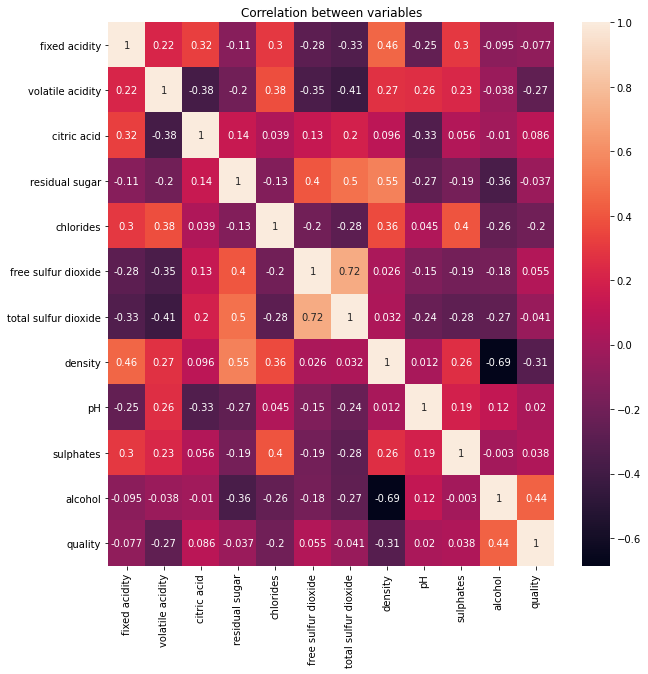

In [6]:
#Check correlation
corr = full.corr()
fig, ax = plt.subplots(figsize = (10,10))
g= sns.heatmap(corr,ax=ax, annot= True)
ax.set_title('Correlation between variables')

In [7]:
corr_vec = full.corr()['quality']
print(abs(corr_vec) > 0.05)
print((abs(corr_vec)).idxmin())

fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar          False
chlorides                True
free sulfur dioxide      True
total sulfur dioxide    False
density                  True
pH                      False
sulphates               False
alcohol                  True
quality                  True
Name: quality, dtype: bool
pH


In [8]:
#Remove not needed data
opt_data = full.drop(['residual sugar','pH','sulphates','total sulfur dioxide'], axis = 1)

In [9]:
#Scale data with MinMax Scaler
scaler = MinMaxScaler()

#this function return scaled data
def Khoi_Scaler(data):
  scaler.fit(data)
  return scaler.transform(data)

In [10]:
#Scale data with Robust Scaler
transform = RobustScaler()

#this funtion return scaled data
def Khoi_Robust(data):
  return transform.fit_transform(data)

In [11]:
#Scale data with Standard Scaler
khoi_scaler = StandardScaler()

#this function return data scaled by Standard Scaler
def Khoi_SD_Scaler(data):
  return khoi_scaler.fit_transform(data)

In [12]:
#Data partition

#This is function return train and target data set
def needed_data(data, target_label, index):
  #Scale data
  data = Khoi_Robust(data)
  # data = Khoi_SD_Scaler(data)
  # data = Khoi_Scaler(data)
  #split data
  X_train_full1, X_test_full1,Y_train_full1,Y_test_full1 = train_test_split(np.delete(data, index, axis = 1),data[:,index], test_size = 0.1, random_state = 100)
  X_train_full2, X_test_full2,Y_train_full2, Y_test_full2 = train_test_split(np.delete(data, index, axis = 1),data[:,index], test_size = 0.1, random_state = 220)
  X_train_full3, X_test_full3,Y_train_full3,Y_test_full3 = train_test_split(np.delete(data, index, axis = 1),data[:,index], test_size = 0.1, random_state = 343)
  #store data
  train_full = [X_train_full1, X_train_full2, X_train_full3]
  test_full = [X_test_full1, X_test_full2, X_test_full3]
  Y_test_full = [Y_test_full1, Y_test_full2, Y_test_full3]  
  #return data
  return [train_full, test_full, Y_test_full]

# **K mean clustering**

## **Preparation**

In [13]:
all_label_target = opt_data.columns

In [14]:
#This function calculate the 
def re_cm(cnf_matrix):
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)
  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)

  return [np.mean(ACC), np.mean(TPR), np.mean(FPR), np.mean(FNR), np.mean(PPV)]

In [38]:
#This function plot the train data and centroid
def Khoi_PLOT(train_data, centers, train_labels, figure, _title):
  plt.figure(k)
  plt.title(_title)
  plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=50, cmap='viridis')
  plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

## **K mean with 2 cluster**

THE CONFUSION MATRIX OF fixed acidity in 0th test: 
    0    1
0  62  329
1  78  181

The centroids of fixed acidity in 0th test: 
[[ 1.60607309 -0.55095273  1.74325173 -0.44201363  0.36432675 -0.11227108
  -0.63596168]
 [-0.09783178  0.25257716 -0.08423658  0.21330271 -0.16199943  0.17260208
  -0.04365256]]

The Accuracy is: 0.37384615384615383 
The True positive rate is: 0.4287047368888801 
The False Positive Rate is: 0.5712952631111199 
The False Negative Rate is:0.5712952631111199 
The Precision is 0.3988795518207283

THE CONFUSION MATRIX OF fixed acidity in 1th test: 
    0    1
0  61  322
1  90  177

The centroids of fixed acidity in 1th test: 
[[ 1.59537197 -0.60021008  1.6837146  -0.44329044  0.35484345 -0.11279956
  -0.63529412]
 [-0.09985055  0.25290522 -0.08529167  0.21775407 -0.16217699  0.17131549
  -0.04279028]]

The Accuracy is: 0.36615384615384616 
The True positive rate is: 0.4110951389092616 
The False Positive Rate is: 0.5889048610907384 
The False Negative Rate is:0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


THE CONFUSION MATRIX OF quality in 0th test: 
    0    1
0  74  157
1  72  347

The centroids of quality in 0th test: 
[[ 1.06084467  1.47418839 -0.22783516  1.7984305  -0.49566034  0.43398989
  -0.05528381]
 [-0.10933449 -0.07174488  0.15836276 -0.11798585  0.23603464 -0.18859998
   0.15727258]]

The Accuracy is: 0.6476923076923077 
The True positive rate is: 0.5742543057578857 
The False Positive Rate is: 0.4257456942421143 
The False Negative Rate is:0.4257456942421143 
The Precision is 0.5976706892802783

THE CONFUSION MATRIX OF quality in 1th test: 
     0   1
0  152  81
1  337  80

The centroids of quality in 1th test: 
[[-0.11401809 -0.07681319  0.15612451 -0.12043908  0.24003073 -0.19004379
   0.15404018]
 [ 1.04645604  1.4737605  -0.26841837  1.74481481 -0.49516369  0.42858833
  -0.0498082 ]]

The Accuracy is: 0.3569230769230769 
The True positive rate is: 0.4221035189016169 
The False Positive Rate is: 0.5778964810983831 
The False Negative Rate is:0.5778964810983831 
The Pre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


THE CONFUSION MATRIX OF quality in 2th test: 
    0    1
0  76  151
1  77  346

The centroids of quality in 2th test: 
[[ 1.02897674  1.47893453 -0.26432145  1.7982686  -0.48342566  0.43019054
  -0.0523853 ]
 [-0.10621022 -0.07585035  0.16553186 -0.11427525  0.24254815 -0.18506469
   0.15574166]]

The Accuracy is: 0.6492307692307693 
The True positive rate is: 0.5763843325939118 
The False Positive Rate is: 0.42361566740608825 
The False Negative Rate is:0.42361566740608825 
The Precision is 0.5964545442590181



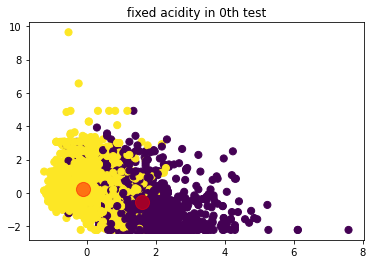

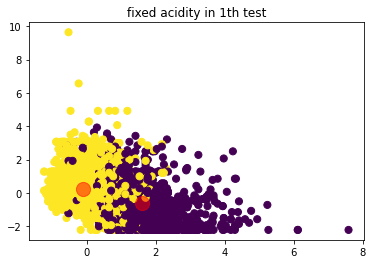

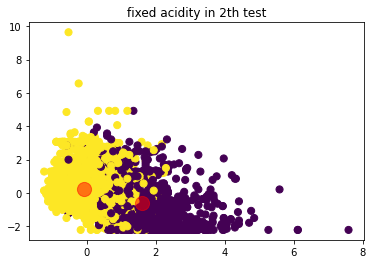

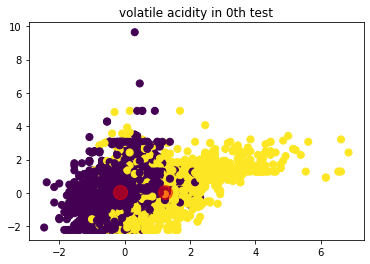

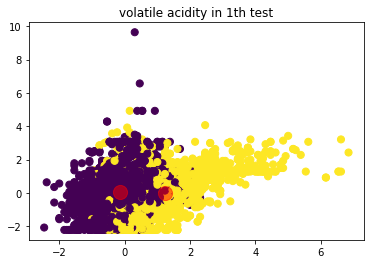

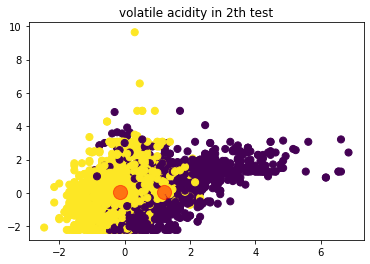

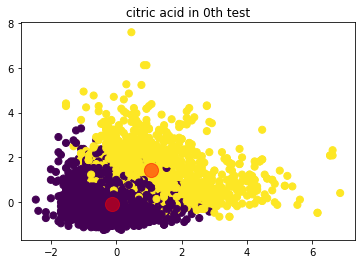

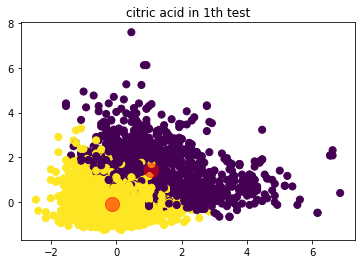

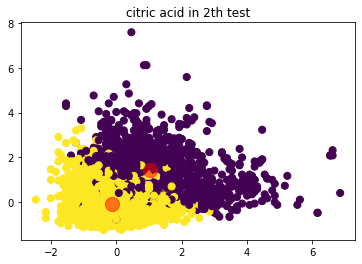

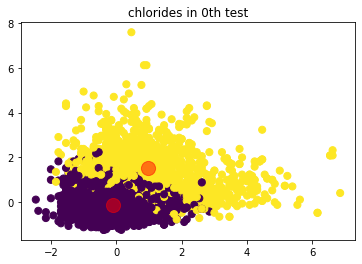

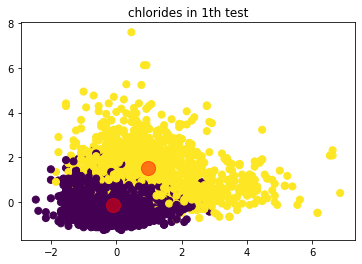

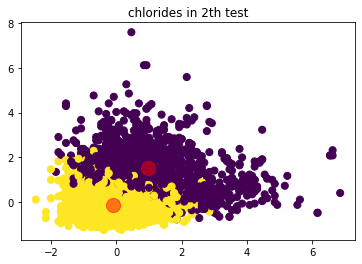

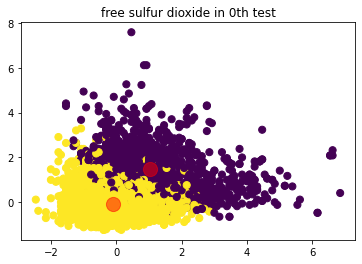

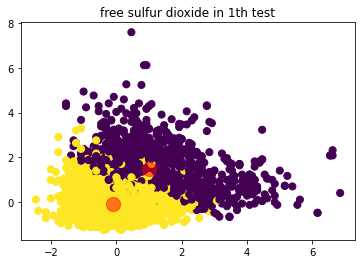

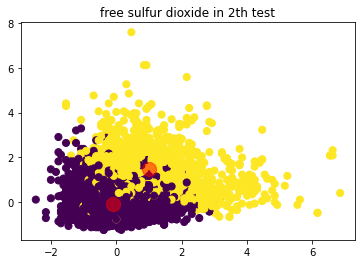

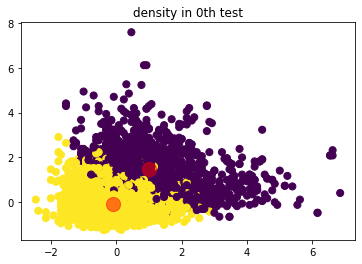

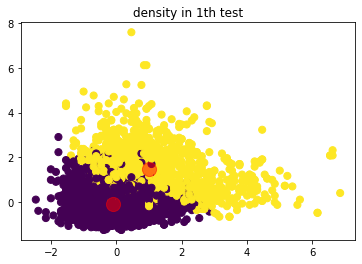

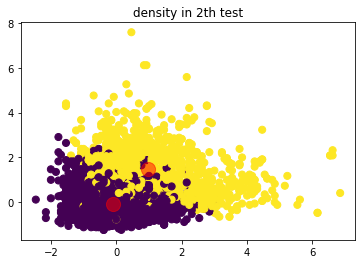

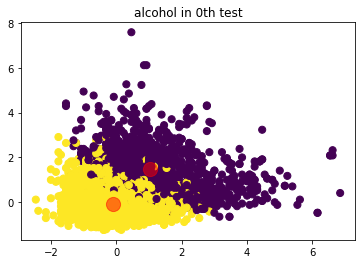

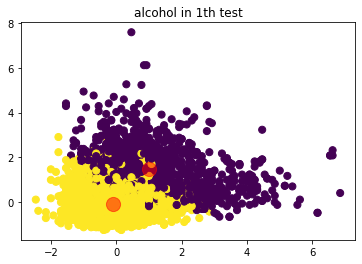

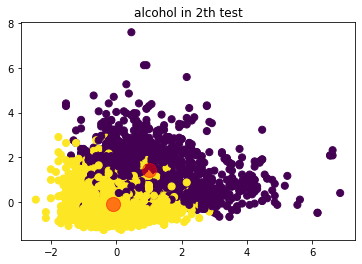

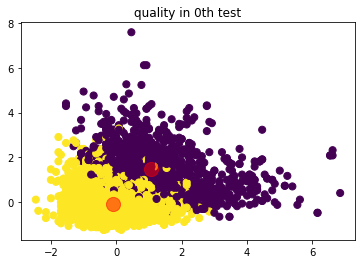

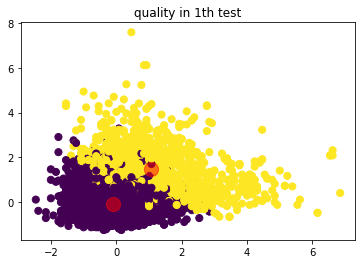

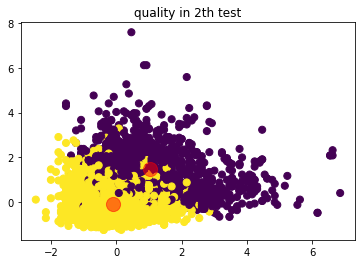

In [39]:
len_target = len(all_label_target)
k = 0
index = 0
while index < len_target:
  # Get needed data
  [train, test, y_actual] = needed_data(opt_data, all_label_target[index], index)
  #Train
  pred = []
  centroids = []
  j = 0
  while j < len(train):
    #Train
    model_kmeans = KMeans(n_clusters=2, random_state=0).fit(train[j])
    centroids.append(model_kmeans.cluster_centers_)
    #Test
    pred.append(model_kmeans.predict(test[j]))
    #Confusion Matrix
    y_actual[j][y_actual[j] > np.mean(y_actual[j])] = 1
    y_actual[j][y_actual[j] <= np.mean(y_actual[j])] = 0
    cmatrix = confusion_matrix(y_actual[j].astype(np.int16), pred[j])
    cm_table = pd.DataFrame(cmatrix)
    cal = re_cm(cmatrix)
    print("THE CONFUSION MATRIX OF {0} in {1}th test: \n{2}\n".format(all_label_target[index], j, cm_table))
    print("The centroids of {0} in {1}th test: \n{2}\n".format(all_label_target[index], j, centroids[j]))
    print("The Accuracy is: {0} \nThe True positive rate is: {1} \nThe False Positive Rate is: {2} \nThe False Negative Rate is:{3} \nThe Precision is {4}\n".format(cal[0], cal[1], cal[2], cal[3], cal[4]))
    Khoi_PLOT(train[j], centroids[j], model_kmeans.labels_, k, "{0} in {1}th test".format(all_label_target[index], j))
    k += 1
    j += 1
  index += 1

## **K mean with 3 cluster**

THE CONFUSION MATRIX OF fixed acidity in 0th test: 
     0    1   2
0  116  490  10
1   14   14   3
2    1    2   0

The centroids of fixed acidity in 0th test: 
[[ 1.71858015 -0.89446326  1.1342479  -0.46657809  0.3185829  -0.10241967
  -0.7007359 ]
 [-0.09957965  0.30118572 -0.04248656  0.20567022 -0.14336631  0.17613593
  -0.02996005]
 [ 0.73778664  1.04418886  6.70872567  0.01518362  0.19826863 -0.38794727
  -0.56779661]]

The Accuracy is: 0.4666666666666666 
The True positive rate is: 0.2133081971791649 
The False Positive Rate is: 0.41869985928617487 
The False Negative Rate is:0.7866918028208351 
The Precision is 0.30438805579861006

THE CONFUSION MATRIX OF fixed acidity in 1th test: 
     0    1    2
0  114  227  275
1   13    3   16
2    0    0    2

The centroids of fixed acidity in 1th test: 
[[ 1.77741114 -0.85499748  1.7525193  -0.4687684   0.33614879 -0.10029774
  -0.6245583 ]
 [-0.08493757  0.06454925 -0.29913574  0.03220332 -0.63875708  0.71983088
   0.49017729]
 [-0.04

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


THE CONFUSION MATRIX OF citric acid in 1th test: 
     0    1    2
0  268  214  142
1   12    1   11
2    1    0    1

The centroids of citric acid in 1th test: 
[[-0.00838702 -0.05779054  0.05767829  0.37610961  0.18541851 -0.30524179
  -0.54882285]
 [-0.24601435 -0.06478208 -0.31947803  0.04095423 -0.68138281  0.76871522
   0.52953368]
 [ 1.096937    1.50561175  1.79057036 -0.51233346  0.44460663 -0.05841154
  -0.49472097]]

The Accuracy is: 0.6102564102564103 
The True positive rate is: 0.32371794871794873 
The False Positive Rate is: 0.35932138208496034 
The False Negative Rate is:0.6762820512820512 
The Precision is 0.3216271080294915

THE CONFUSION MATRIX OF citric acid in 2th test: 
     0    1    2
0  264  131  229
1   10   13    2
2    0    1    0

The centroids of citric acid in 2th test: 
[[-6.54917838e-04 -6.67455837e-02  6.39118220e-02  3.80611455e-01
   1.92569659e-01 -3.05531189e-01 -5.47213622e-01]
 [ 1.07836035e+00  1.50461620e+00  1.83485578e+00 -4.98956776e-01
   4.3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


THE CONFUSION MATRIX OF density in 0th test: 
    0    1    2
0  53  486  110
1   0    1    0
2   0    0    0

The centroids of density in 0th test: 
[[ 2.02631226  0.7026486   1.28658689  2.48232176 -0.45866056  0.04107685
  -0.23211169]
 [-0.0959867  -0.12466664  0.20383234 -0.12466613  0.25918585  0.16091187
  -0.04674654]
 [ 0.23893805  1.83703511 -1.19813176  1.07738811 -0.47455752 -0.08447139
  -0.71484759]]

The Accuracy is: 0.3887179487179487 
The True positive rate is: nan 
The False Positive Rate is: 0.3060250483979297 
The False Negative Rate is:nan 
The Precision is 0.33401779603011633

THE CONFUSION MATRIX OF density in 1th test: 
     0   1    2
0  473  70  106
1    1   0    0
2    0   0    0

The centroids of density in 1th test: 
[[-0.10640334 -0.12491544  0.19730446 -0.12702635  0.26191035  0.15927143
  -0.04811077]
 [ 2.07339574  0.69239548  1.25610985  2.36599386 -0.4569371   0.0384741
  -0.23985891]
 [ 0.23137314  1.82664665 -1.21141175  1.08625014 -0.47372833 -0.08

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


THE CONFUSION MATRIX OF density in 2th test: 
    0    1    2
0  58  478  114
1   0    0    0
2   0    0    0

The centroids of density in 2th test: 
[[ 2.03246934  0.75634058  1.25245859  2.58937198 -0.44146286  0.01043344
  -0.25543478]
 [-0.08782606 -0.12335895  0.21203218 -0.11818268  0.26110559  0.15892602
  -0.05211498]
 [ 0.21751969  1.81299213 -1.21273903  1.06678332 -0.46362369 -0.06530694
  -0.70472441]]

The Accuracy is: 0.39282051282051283 
The True positive rate is: nan 
The False Positive Rate is: nan 
The False Negative Rate is:nan 
The Precision is 0.3333333333333333



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


THE CONFUSION MATRIX OF alcohol in 0th test: 
    0    1    2
0  55  483  111
1   0    1    0
2   0    0    0

The centroids of alcohol in 0th test: 
[[ 2.04604645  0.72179448  1.31313887  2.44812876 -0.45706079  0.56851133
  -0.2390925 ]
 [-0.09900954 -0.12709393  0.19951665 -0.12132762  0.25894326 -0.18759676
  -0.04675752]
 [ 0.24013904  1.83447937 -1.19365703  1.08149603 -0.47372299  0.23543106
  -0.71021611]]

The Accuracy is: 0.39076923076923076 
The True positive rate is: nan 
The False Positive Rate is: 0.30499703686144364 
The False Negative Rate is:nan 
The Precision is 0.3340220385674931



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


THE CONFUSION MATRIX OF alcohol in 1th test: 
     0    1   2
0  471  106  71
1    2    0   0
2    0    0   0

The centroids of alcohol in 1th test: 
[[-0.109131   -0.12624392  0.19226638 -0.12556565  0.26307957 -0.19071065
  -0.04863722]
 [ 0.22789502  1.82543814 -1.21133586  1.08893259 -0.47560226  0.2302048
  -0.70009833]
 [ 2.07437684  0.70121951  1.2755102   2.32423539 -0.45608304  0.57917275
  -0.23867596]]

The Accuracy is: 0.8164102564102563 
The True positive rate is: nan 
The False Positive Rate is: 0.4242703387147832 
The False Negative Rate is:nan 
The Precision is 0.33192389006342493



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 2

THE CONFUSION MATRIX OF alcohol in 2th test: 
    0    1    2
0  60  114  475
1   0    0    1
2   0    0    0

The centroids of alcohol in 2th test: 
[[ 2.05325444  0.76154898  1.24533606  2.54455708 -0.44935152  0.57890242
  -0.25402504]
 [ 0.2157026   1.81377374 -1.20746625  1.06485127 -0.46062992  0.22519897
  -0.70177165]
 [-0.09358794 -0.12566782  0.21000535 -0.1162956   0.26257705 -0.18111886
  -0.05266854]]

The Accuracy is: 0.3948717948717948 
The True positive rate is: nan 
The False Positive Rate is: 0.3026541819762159 
The False Negative Rate is:nan 
The Precision is 0.3333333333333333

THE CONFUSION MATRIX OF quality in 0th test: 
     0   1    2
0  468  55  106
1   21   0    0
2    0   0    0

The centroids of quality in 0th test: 
[[-0.0969417  -0.11739375  0.19498204 -0.12229292  0.2536565  -0.18583303
   0.15589265]
 [ 2.04376426  0.71676419  1.30142109  2.45840605 -0.46004218  0.56721275
   0.0462155 ]
 [ 0.24626396  1.87504511 -1.22385335  1.1289101  -0.47871933  0.24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 2

THE CONFUSION MATRIX OF quality in 1th test: 
     0    1   2
0  459  100  69
1   21    0   1
2    0    0   0

The centroids of quality in 1th test: 
[[-0.10546021 -0.11848955  0.19013241 -0.12422157  0.25824309 -0.18869641
   0.15373691]
 [ 0.22990932  1.86038379 -1.24027294  1.1258657  -0.47980183  0.23821575
  -0.06979261]
 [ 2.0819251   0.70272925  1.26977153  2.34218577 -0.46148213  0.58129524
   0.0418538 ]]

The Accuracy is: 0.8041025641025641 
The True positive rate is: nan 
The False Positive Rate is: 0.40715781034252374 
The False Negative Rate is:nan 
The Precision is 0.31875000000000003

THE CONFUSION MATRIX OF quality in 2th test: 
    0    1    2
0  59  107  466
1   1    1   16
2   0    0    0

The centroids of quality in 2th test: 
[[ 2.04202026  0.73890517  1.25101678  2.53018321 -0.44888049  0.57329048
   0.02131936]
 [ 0.22512925  1.85410926 -1.2317428   1.11465641 -0.47053208  0.23489696
  -0.05601758]
 [-0.09332487 -0.11720961  0.20288171 -0.11830678  0.25955729 -0.

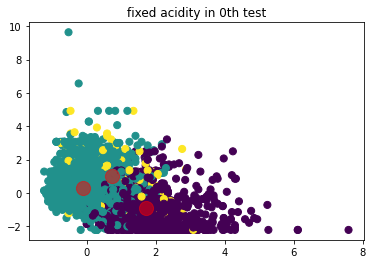

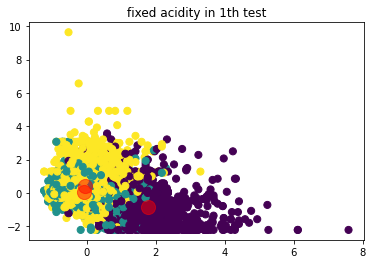

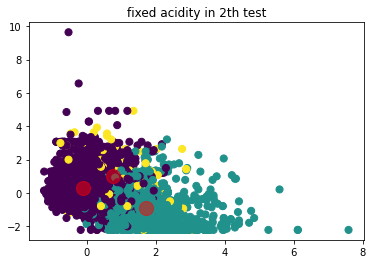

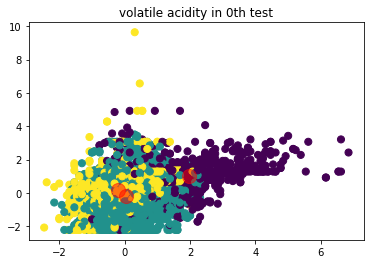

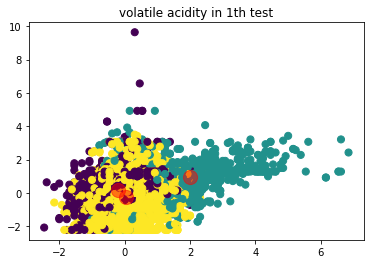

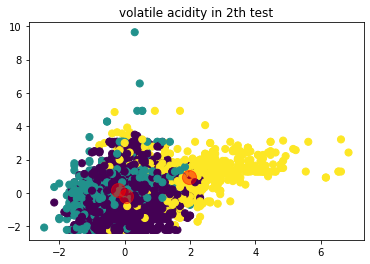

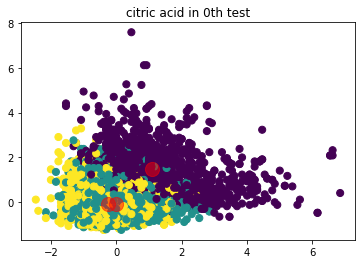

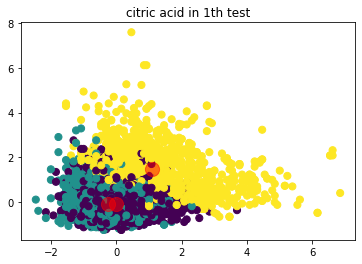

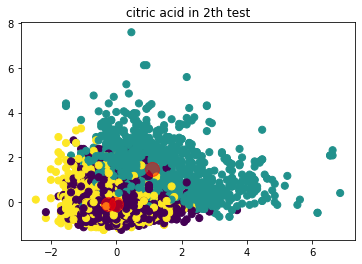

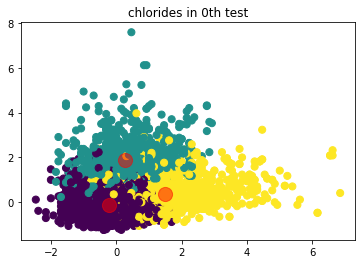

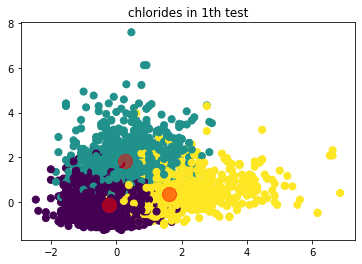

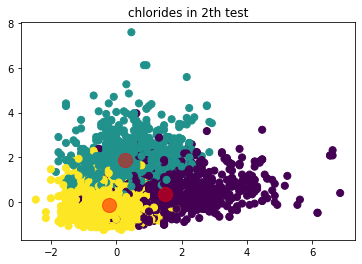

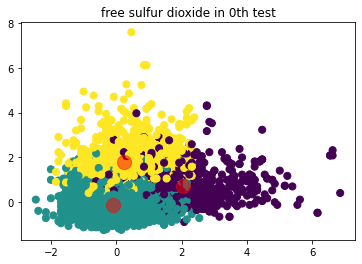

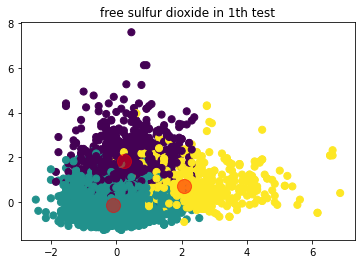

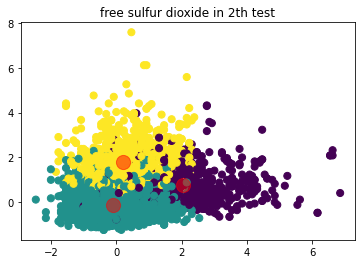

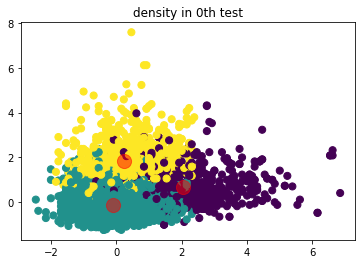

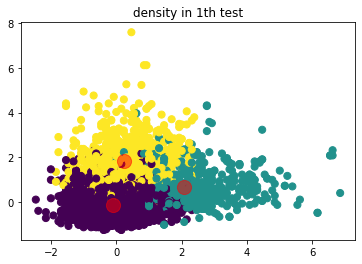

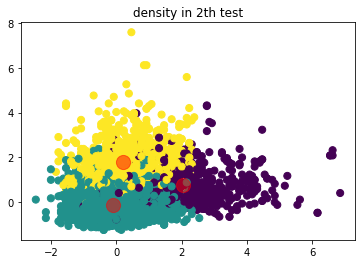

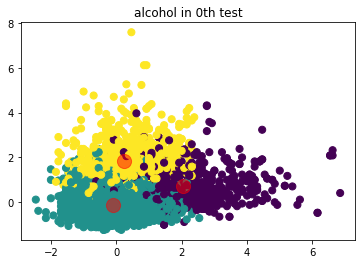

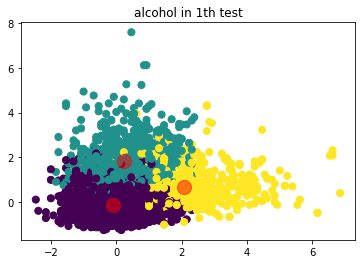

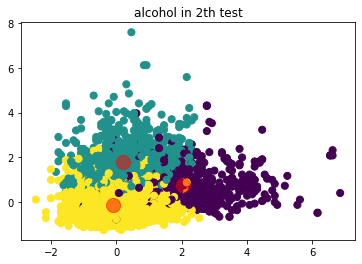

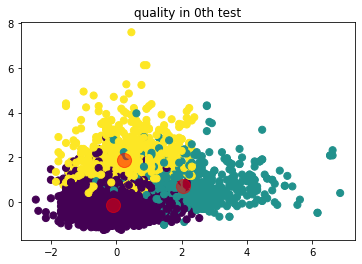

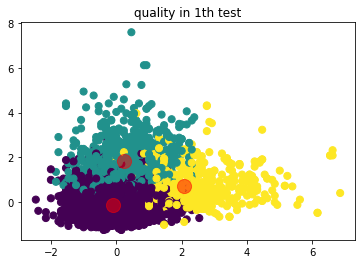

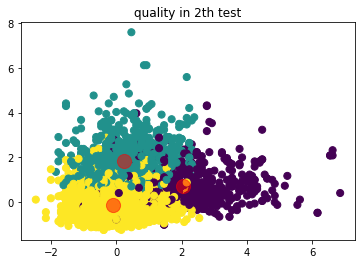

In [40]:
len_target = len(all_label_target)
k = 0
index = 0
while index < len_target:
  # Get needed data
  [train, test, y_actual] = needed_data(opt_data, all_label_target[index], index)
  #Train
  pred = []
  centroids = []
  j = 0
  while j < len(train):
    #Train
    model_kmeans = KMeans(n_clusters=3, random_state=0).fit(train[j])
    centroids.append(model_kmeans.cluster_centers_)
    #Test
    pred.append(model_kmeans.predict(test[j]))
    #Confusion Matrix
    y_actual[j][y_actual[j] < (dis/3)] = 0
    y_actual[j][(y_actual[j] >= (dis/3)) & (y_actual[j] < (dis/3)*2)] = 1
    y_actual[j][y_actual[j] >= (dis/3)*2] = 2
    cmatrix = confusion_matrix(y_actual[j].astype(np.int16), pred[j])
    cm_table = pd.DataFrame(cmatrix)
    cal = re_cm(cmatrix)
    print("THE CONFUSION MATRIX OF {0} in {1}th test: \n{2}\n".format(all_label_target[index], j, cm_table))
    print("The centroids of {0} in {1}th test: \n{2}\n".format(all_label_target[index], j, centroids[j]))
    print("The Accuracy is: {0} \nThe True positive rate is: {1} \nThe False Positive Rate is: {2} \nThe False Negative Rate is:{3} \nThe Precision is {4}\n".format(cal[0], cal[1], cal[2], cal[3], cal[4]))
    Khoi_PLOT(train[j], centroids[j], model_kmeans.labels_, k, "{0} in {1}th test".format(all_label_target[index], j))
    k += 1
    j += 1
  index += 1